# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.



## Camera Calibration
show how to calibration the camera
1. get the chessboard used cv2.findChessboardCorners: def get_chessboard(glob_dir='camera_cal/calibration*.jpg'):
2. show the chessboard used cv2.drawChessboardCorners: def show_chess(imgs):
3. get the calibrate matrix used cv2.calibrateCamera :def calibrate_camera(objpoints, imgpoint, img):
4. calibrate the camera used cv2.undistort :  def calibrate_camera(objpoints, imgpoint, img):

In [50]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [51]:
def get_chessboard(glob_dir='camera_cal/calibration*.jpg'):
    """
    return objpoints, imgpoints, chess_imgs
    get the chessboard from the imgs in glob_dir
    """
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    chess_imgs = [] #array of images which has chessboard
    # Make a list of calibration images
    images = glob.glob(glob_dir)
    
    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            chess_imgs.append(img)
        else:
            print("ret==false: ",fname)
    return objpoints, imgpoints, chess_imgs

In [52]:
def show_chess(imgs):
    """
    show the imgs.
    """
    length = len(imgs)
    row = int(length/3) + 1
    %matplotlib inline
    fig, axs = plt.subplots(row, 3, figsize=(35, 35))
    # fig.subplots_adjust(hspace = .2, wspace=.001)
    axis = axs.ravel()
    print("The chessboards: ")
    i = 0
    for img in imgs:        
        axis[i].axis('off')
        axis[i].imshow(img)
        i = i + 1

ret==false:  camera_cal/calibration4.jpg
ret==false:  camera_cal/calibration5.jpg
ret==false:  camera_cal/calibration1.jpg
The chessboards: 


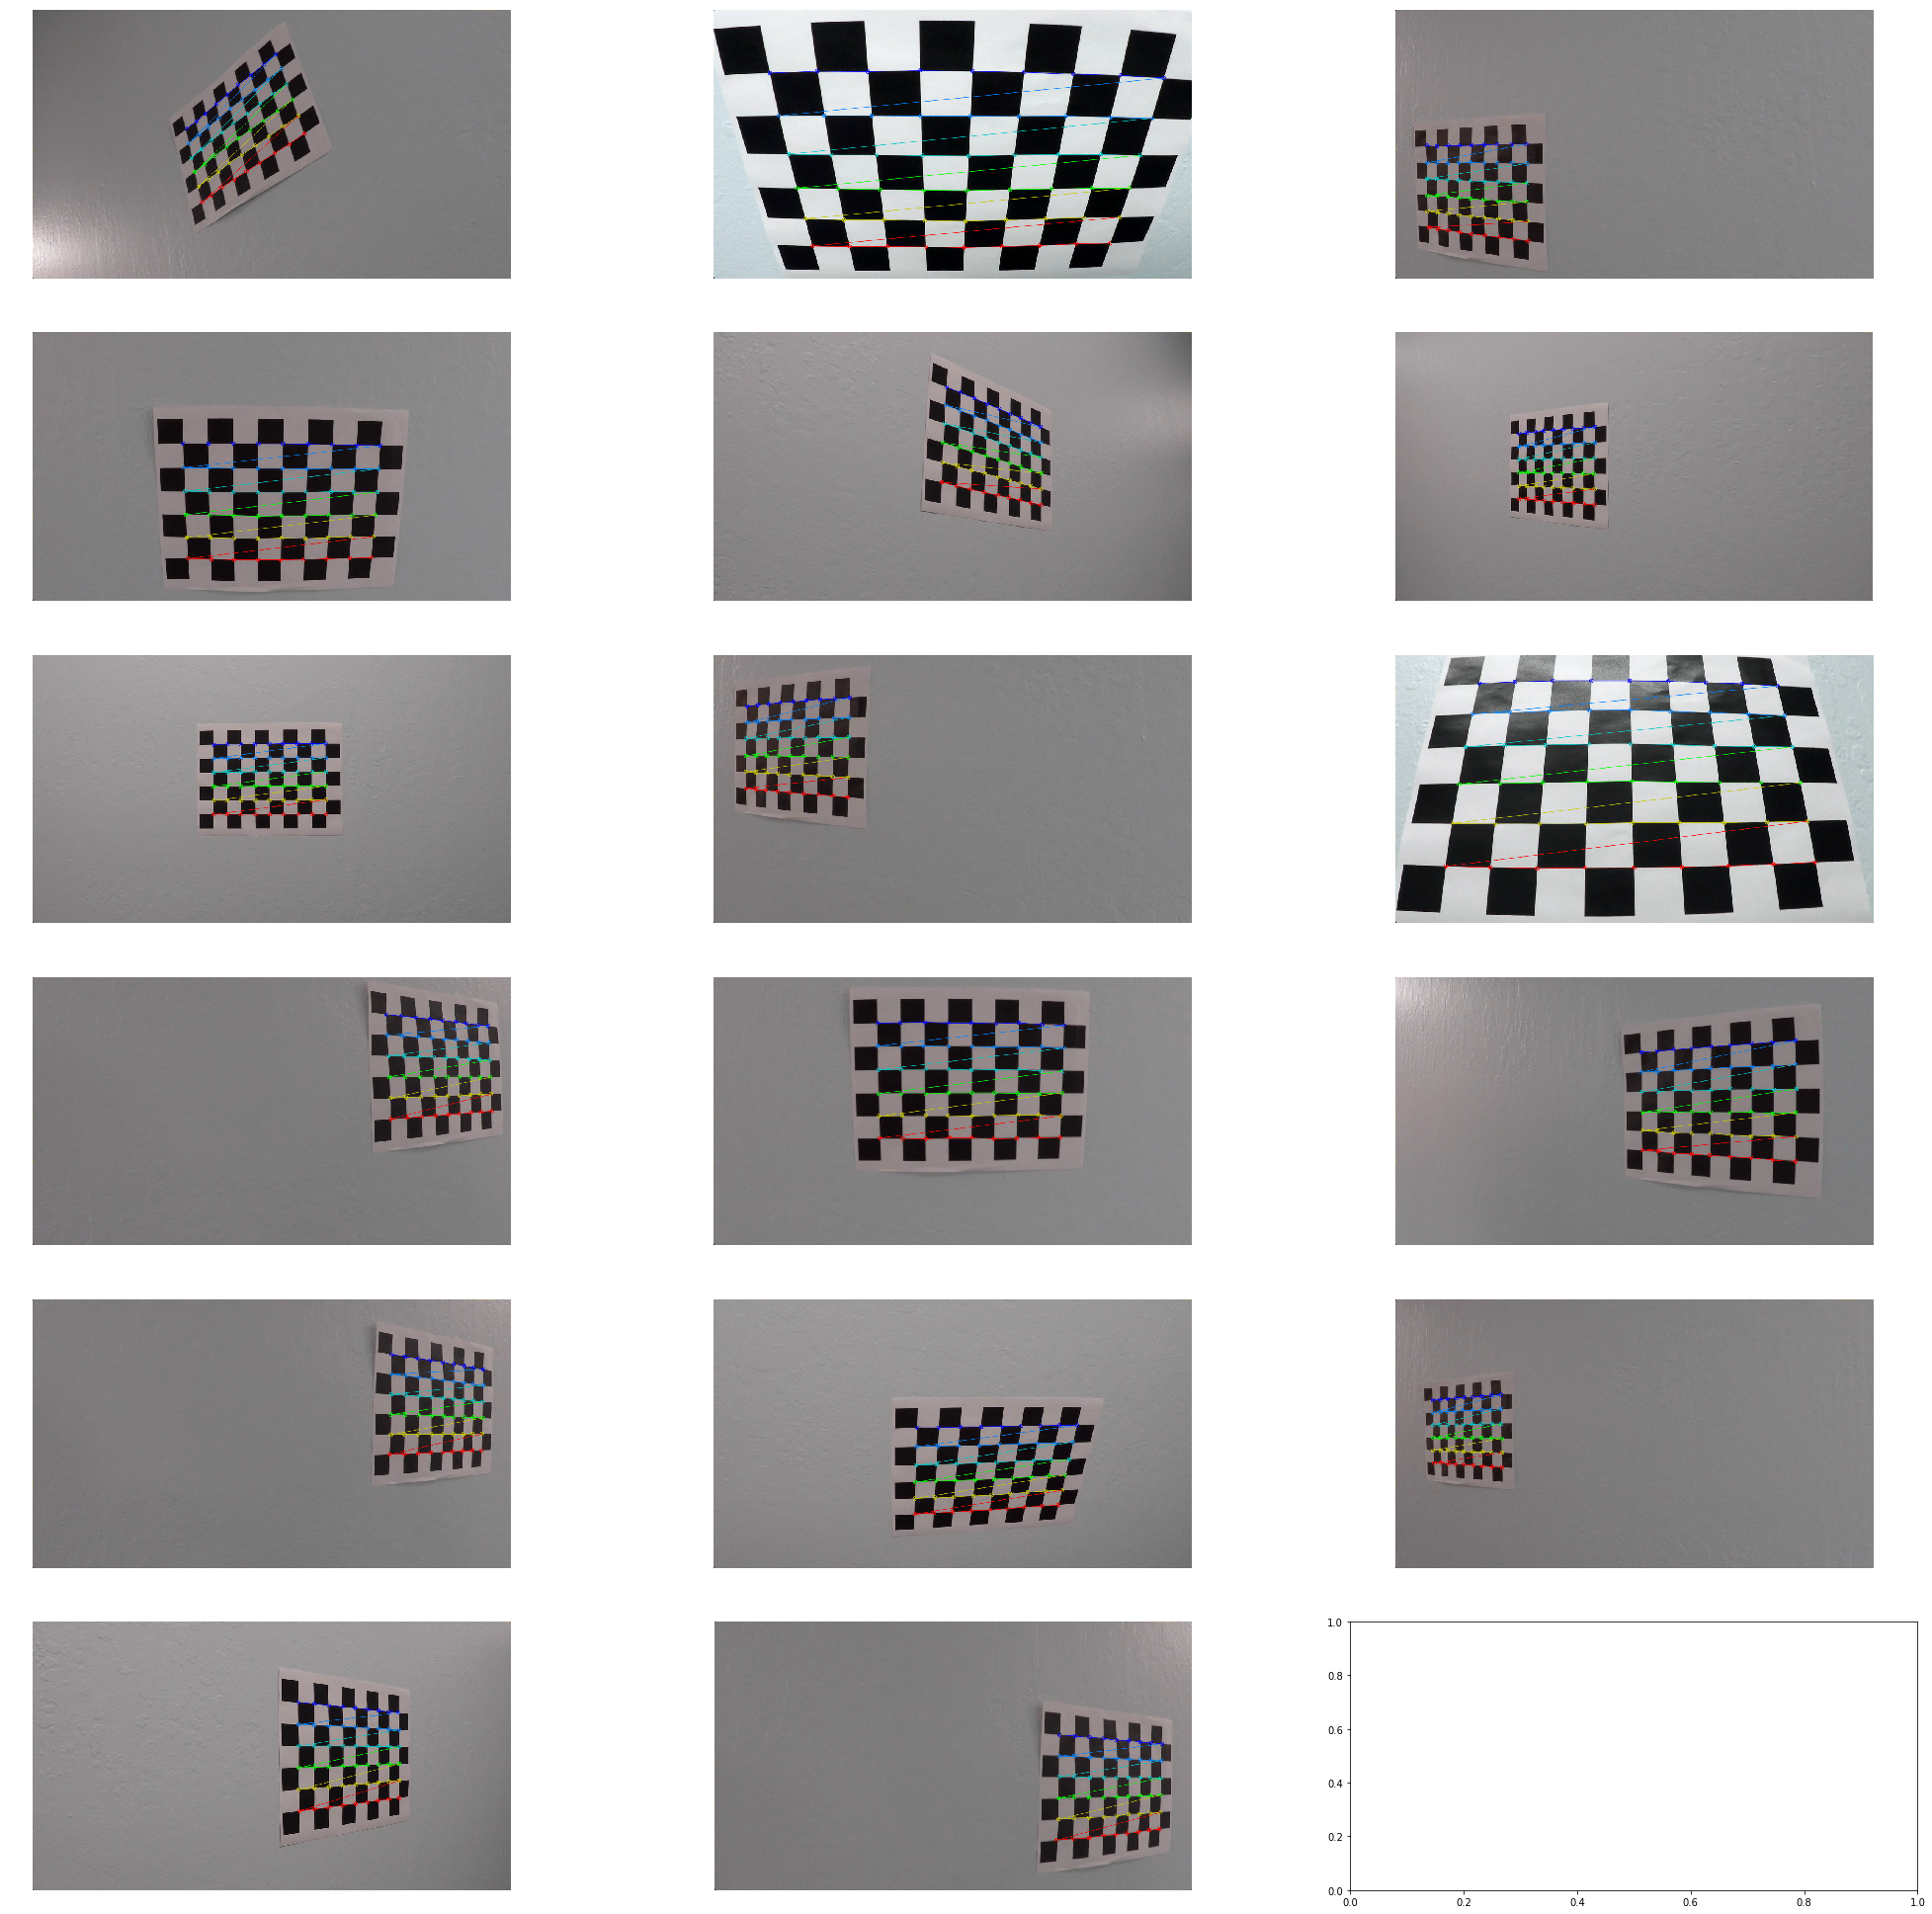

In [53]:
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
chess_imgs = [] #array of images which has chessboard
objpoints, imgpoints, chess_imgs = get_chessboard(glob_dir='camera_cal/calibration*.jpg')
show_chess(chess_imgs)

In [54]:
def calibrate_camera(objpoints, imgpoint, img):
    """
    return the matrix and undistort imgs
    """
    # Test undistortion on an image
    img_size = img.shape[0:2]

    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return ret, mtx, dist, undist
    

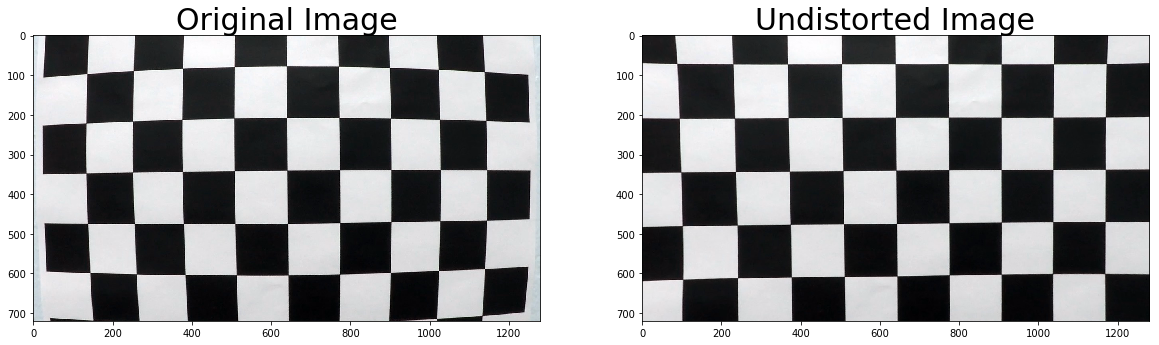

In [55]:
test_img='./camera_cal/calibration1.jpg'
undist='./output_images/undist_calibration1.jpg'


img = cv2.imread(test_img)
ret, mtx, dist, dst = calibrate_camera(objpoints, imgpoints, img)

cv2.imwrite(undist, dst)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Finally calibration : ret, mtx, dist, dst = calibrate_camera(objpoints, imgpoints, img)

## undistort_image

In [56]:
def undistort(image, mtx = mtx, dist = dist):
#     img_size = image.shape[0:2]
#     ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    return undist

## color transforms

In [84]:
def color_threshold(img, s_thresh=(90, 255), r_thresh = (140, 255), u_thresh = (140, 200)):
    """
    input image is in BGR img.(read by cv2)
    In HSV RGB YUV space
    return the combine of S R U space.
    """
    
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    s_binary = np.zeros_like(S)
    s_binary[(S > s_thresh[0]) & (S <= s_thresh[1])] = 1
    
    # RGB colour
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    r_binary = np.zeros_like(R)
    r_binary[(R > r_thresh[0]) & (R <= r_thresh[1])] = 1
    
    # YUV colour
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    Y = yuv[:,:,0]
    U = yuv[:,:,1]
    V = yuv[:,:,2]
    u_binary = np.zeros_like(U)
    u_binary[(U > u_thresh[0]) & (U <= u_thresh[1])] = 1
    
    #combine the color transform
    combined = np.zeros_like(u_binary)
    combined[ (r_binary == 1)&(s_binary == 1)] = 1
    return combined

## show the color threshold 

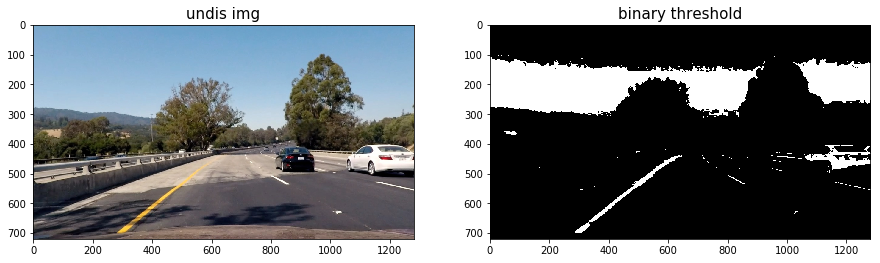

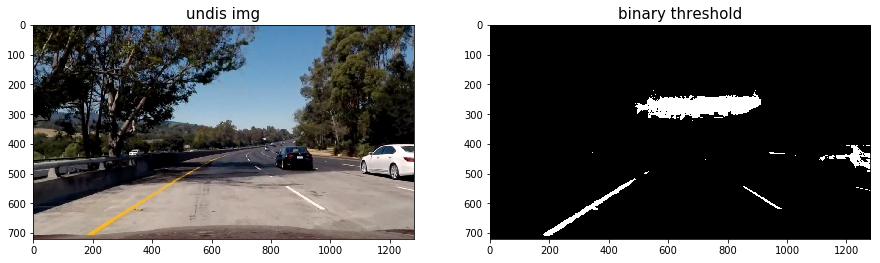

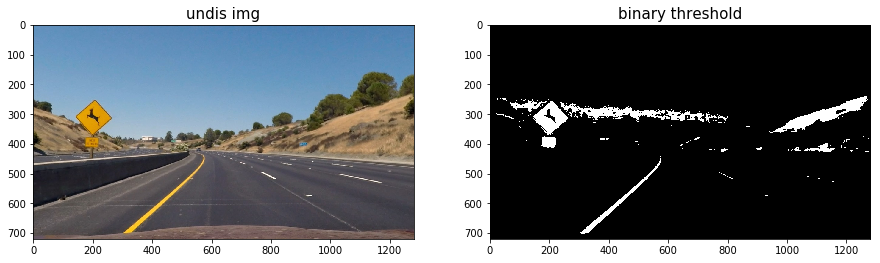

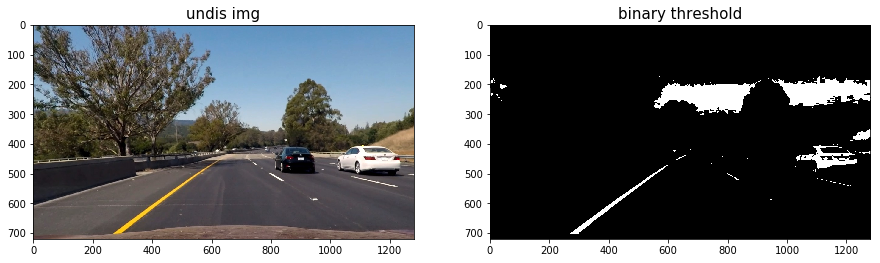

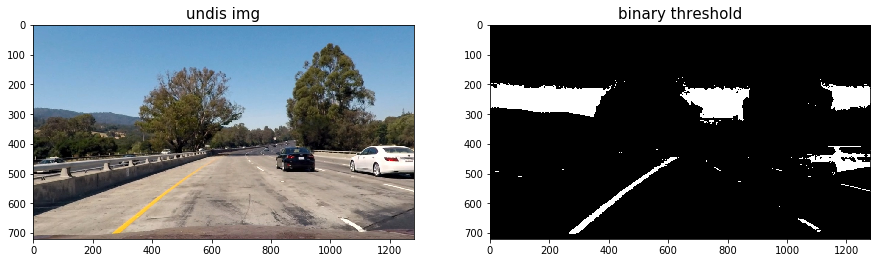

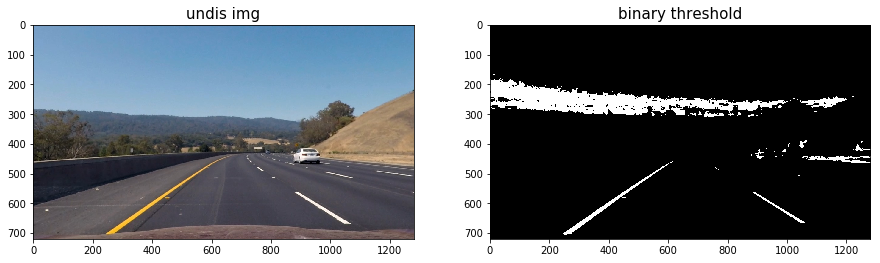

In [85]:
filenames = 'test_images/test*.jpg'
names = glob.glob(filenames)
color_thres = []
images = []
for filenames in names:
    origin = cv2.imread(filenames) #get img
    undis = undistort(origin)  #undistort
    images.append(undis)
    color_thre = color_threshold(undis)
    color_thres.append(color_thre)
#show the color threshold
j = 0
for binary in color_thres:
    f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,10))
    axis1.imshow(cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB))
    axis1.set_title("undis img", fontsize = 15)
    axis2.imshow(binary, cmap='gray')
    axis2.set_title("binary threshold", fontsize = 15)
    j = j+1 

## gradient Threshold
* Sobel 
* Magnitude of gradient
* Direction of gradient
* combining the threshold

In [103]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(20, 100)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    grad_binary = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100)):
    """
     Calculate gradient magnitude
    """
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0.7, 1.3)):
    """
    Calculate gradient direction
    """ 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return dir_binary
  

In [108]:
def combine_threshold(image):
    """Input the image in BGR"""
    ksize = 3;
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize)
    mag_binary = mag_thresh(image, sobel_kernel=ksize)
    dir_binary = dir_threshold(image, sobel_kernel=ksize)
    
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    return combined  

## test gradient threshold

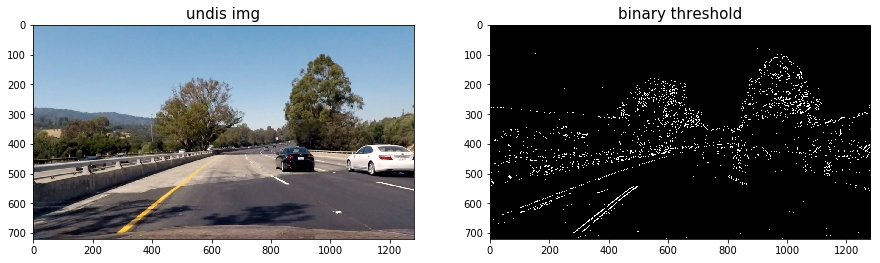

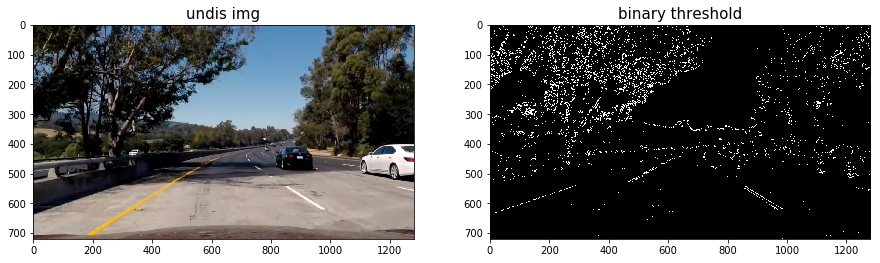

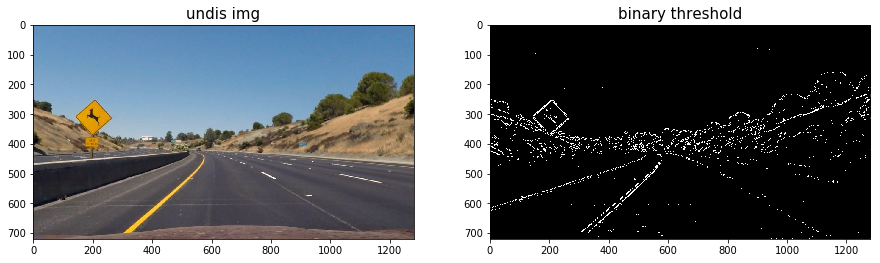

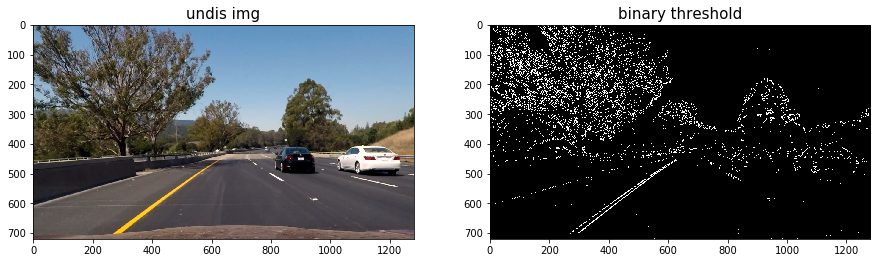

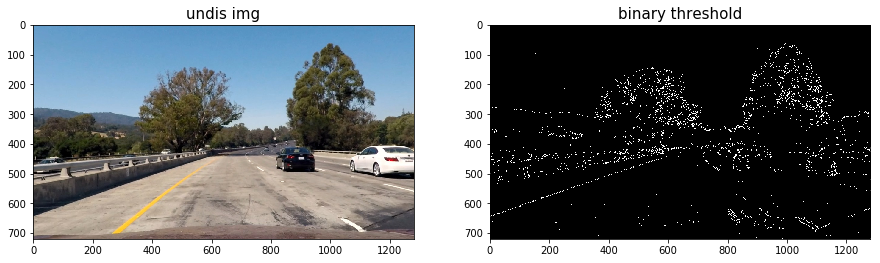

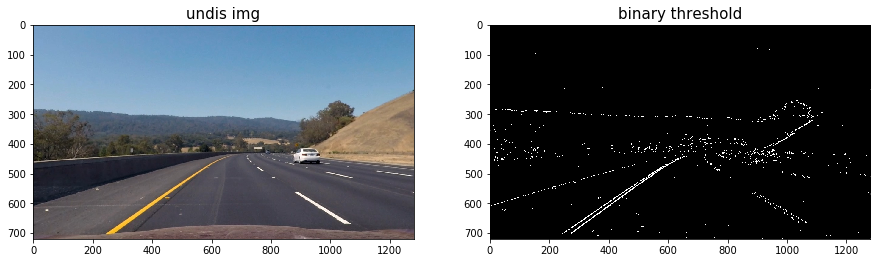

In [110]:
filenames = 'test_images/test*.jpg'
names = glob.glob(filenames)
graident_thres = []
images = []
for filenames in names:
    origin = cv2.imread(filenames) #get img
    undis = undistort(origin)  #undistort
    images.append(undis)
    color_thre = color_threshold(undis)
    graident_thre = combine_threshold(undis)
    combined = np.zeros_like(color_thre)
    combined[((color_thre == 1) | (graident_thre == 1))] = 1 
    graident_thres.append(graident_thre)
#show the color threshold
j = 0
for binary in graident_thres:
    f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,10))
    axis1.imshow(cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB))
    axis1.set_title("undis img", fontsize = 15)
    axis2.imshow(binary, cmap='gray')
    axis2.set_title("binary threshold", fontsize = 15)
    j = j+1 

## perspective transform
perspective transform to rectify binary image ("birds-eye view").

In [ ]:
def perspective_birds(img):
    undis = undistort(origin)  #undistort
        offset = 0
    source = np.float32([[490, 482],[810, 482],
                      [1250, 720],[40, 720]])
    destination = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    M = cv2.getPerspectiveTransform(source, destination)
    warped = cv2.warpPerspective(undist_image, M, image_size)
    return warped, M